In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!ls

data_processing.ipynb  processed_data_3_majority.csv  processed_data.csv
datasets	       processed_data_5_majority.csv


In [ ]:
%cd drive/Shareddrives/CS704_Project/data_processing
#%cd ..

/content/drive/Shareddrives/CS704_Project/data_processing


In [ ]:
import pandas as pd
df = pd.read_csv("processed_data_3_majority.csv")
df.head()

<ipython-input-28-8060f93470f0>:2: DtypeWarning: Columns (0,1,2,3,4,5,11,12,64,65) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("processed_data_3_majority.csv")


,tweet,target,manual_keywords,statement,3_label_majority_answer,followers_count,friends_count,favourites_count,statuses_count,listed_count,...,dots,exclamation,questions,ampersand,capitals,digits,long_word_freq,short_word_freq,cleaned_tweet,Truthfulness
0,@POTUS Biden Blunders - 6 Month Update\n\nInfl...,True,"Americans, eviction moratorium",End of eviction moratorium means millions of A...,Agree,4262.0,3619.0,34945.0,16423.0,44.0,...,5.0,0.0,1.0,0.0,33.0,3.0,5.0,19.0,Biden Blunders 6 Month Update Inflation Delt...,True
1,@S0SickRick @Stairmaster_ @6d6f636869 Not as m...,True,"Americans, eviction moratorium",End of eviction moratorium means millions of A...,Agree,1393.0,1621.0,31436.0,37184.0,64.0,...,1.0,0.0,0.0,0.0,14.0,0.0,2.0,34.0,Not as many people are literally starving and ...,True
2,THE SUPREME COURT is siding with super rich pr...,True,"Americans, eviction moratorium",End of eviction moratorium means millions of A...,Agree,9.0,84.0,219.0,1184.0,0.0,...,0.0,0.0,0.0,0.0,3.0,0.0,4.0,10.0,THE SUPREME COURT is siding with super rich pr...,True
3,@POTUS Biden Blunders\n\nBroken campaign promi...,True,"Americans, eviction moratorium",End of eviction moratorium means millions of A...,Agree,4262.0,3619.0,34945.0,16423.0,44.0,...,3.0,0.0,0.0,1.0,6.0,8.0,1.0,30.0,Biden Blunders Broken campaign promises Infla...,True
4,@OhComfy I agree. The confluence of events rig...,True,"Americans, eviction moratorium",End of eviction moratorium means millions of A...,Agree,70.0,166.0,15282.0,2194.0,0.0,...,3.0,0.0,1.0,0.0,11.0,3.0,2.0,19.0,I agree The confluence of events right now is ...,True


In [ ]:
#df.Truthfulness.unique()
df = df[df['Truthfulness'].isin([True, False])]

In [ ]:
df.Truthfulness.unique()

array([True, False], dtype=object)

In [ ]:
X = df.select_dtypes(include='number').assign(cleaned_tweet=df['cleaned_tweet'])
y = df['Truthfulness']

In [ ]:
X.head()

,friends_count,favourites_count,statuses_count,listed_count,following,BotScoreBinary,cred,normalize_influence,mentions,quotes,...,conjunctions,dots,exclamation,questions,ampersand,capitals,digits,long_word_freq,short_word_freq,cleaned_tweet
0,3619.0,34945.0,16423.0,44.0,0.0,0.0,0.540794,0.104602,1.0,1.0,...,0.0,5.0,0.0,1.0,0.0,33.0,3.0,5.0,19.0,Biden Blunders 6 Month Update Inflation Delt...
1,1621.0,31436.0,37184.0,64.0,0.0,0.0,0.462177,0.094436,3.0,0.0,...,2.0,1.0,0.0,0.0,0.0,14.0,0.0,2.0,34.0,Not as many people are literally starving and ...
2,84.0,219.0,1184.0,0.0,0.0,0.0,0.096774,0.039846,0.0,2.0,...,1.0,0.0,0.0,0.0,0.0,3.0,0.0,4.0,10.0,THE SUPREME COURT is siding with super rich pr...
3,3619.0,34945.0,16423.0,44.0,0.0,0.0,0.540794,0.104602,1.0,0.0,...,1.0,3.0,0.0,0.0,1.0,6.0,8.0,1.0,30.0,Biden Blunders Broken campaign promises Infla...
4,166.0,15282.0,2194.0,0.0,0.0,0.0,0.296610,0.061135,1.0,0.0,...,1.0,3.0,0.0,1.0,0.0,11.0,3.0,2.0,19.0,I agree The confluence of events right now is ...


In [ ]:
len(X.columns)

57

In [ ]:
from sklearn.model_selection import train_test_split


X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.3, random_state=42)


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Create a RandomForestClassifier
# Select all columns except "cleaned_tweet" for X
X1 = X.drop('cleaned_tweet', axis=1)
clf = RandomForestClassifier(random_state=42)
y_numeric = y.map({True: 1, False: 0})


# Fit the model on the data
clf.fit(X1, y_numeric)

# Get feature importances
feature_importances = clf.feature_importances_
feature_importance_dict = dict(zip(X.columns, feature_importances))
sorted_feature_importance = dict(sorted(feature_importance_dict.items(), key=lambda item: item[1], reverse=True))

# Print or return the sorted dictionary
print(sorted_feature_importance)

{'favourites_count': 0.048959624969858846, 'Average word length': 0.04867238524908728, 'normalize_influence': 0.04855349053944763, 'statuses_count': 0.04799343257761269, 'cred': 0.047693370505182006, 'friends_count': 0.04630254048694061, 'Word count': 0.041024882547442694, 'listed_count': 0.04079620719155818, 'capitals': 0.03957491750188888, 'short_word_freq': 0.03578878661342511, 'Max word length': 0.027966167610801163, 'adpositions': 0.025620980018526304, 'digits': 0.025400246094133397, 'adjectives': 0.025284060170780016, 'PERSON_percentage': 0.02371662831823256, 'past_verbs': 0.02331025788927197, 'dots': 0.022983430512401246, 'present_verbs': 0.022631606464320494, 'total_count': 0.020788391941944612, 'long_word_freq': 0.020420054060088823, 'mentions': 0.019627123237239114, 'adverbs': 0.019506421005713013, 'pronouns': 0.0191203587856439, 'favourites': 0.018457937316416328, 'ORG_percentage': 0.018017692343536527, 'conjunctions': 0.015821534795663783, 'GPE_percentage': 0.01538610783609

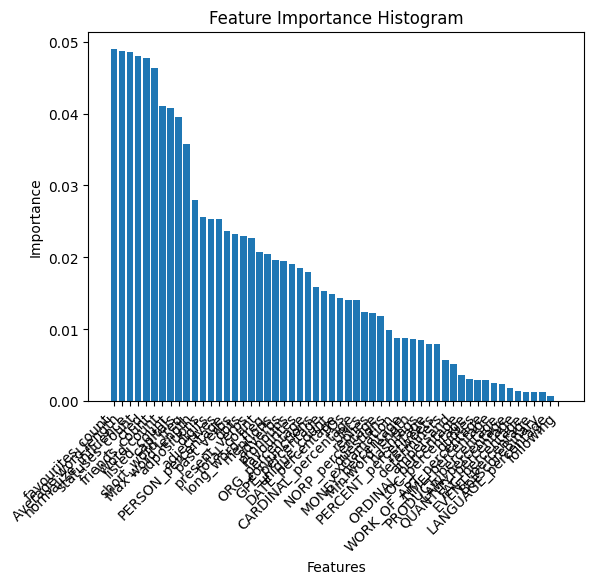

In [ ]:
import matplotlib.pyplot as plt
plt.bar(sorted_feature_importance.keys(), sorted_feature_importance.values())
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance Histogram')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()

In [ ]:
X1.head()

,friends_count,favourites_count,statuses_count,listed_count,following,BotScoreBinary,cred,normalize_influence,mentions,quotes,...,determiners,conjunctions,dots,exclamation,questions,ampersand,capitals,digits,long_word_freq,short_word_freq
0,3619.0,34945.0,16423.0,44.0,0.0,0.0,0.540794,0.104602,1.0,1.0,...,0.0,0.0,5.0,0.0,1.0,0.0,33.0,3.0,5.0,19.0
1,1621.0,31436.0,37184.0,64.0,0.0,0.0,0.462177,0.094436,3.0,0.0,...,0.0,2.0,1.0,0.0,0.0,0.0,14.0,0.0,2.0,34.0
2,84.0,219.0,1184.0,0.0,0.0,0.0,0.096774,0.039846,0.0,2.0,...,0.0,1.0,0.0,0.0,0.0,0.0,3.0,0.0,4.0,10.0
3,3619.0,34945.0,16423.0,44.0,0.0,0.0,0.540794,0.104602,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,1.0,6.0,8.0,1.0,30.0
4,166.0,15282.0,2194.0,0.0,0.0,0.0,0.296610,0.061135,1.0,0.0,...,0.0,1.0,3.0,0.0,1.0,0.0,11.0,3.0,2.0,19.0


In [ ]:
for column in X_train_1.columns:
  print(column)
  print(f"Value counts for {column}:\n{X_train_1[column].value_counts()}\n")

friends_count
Value counts for friends_count:
0.0        646
1.0        321
2.0        181
85.0       174
614.0      174
          ... 
6960.0       1
13603.0      1
26702.0      1
5055.0       1
37485.0      1
Name: friends_count, Length: 7765, dtype: int64

favourites_count
Value counts for favourites_count:
0.0         964
1.0         334
2.0         224
5.0         156
3.0         152
           ... 
19771.0       1
27978.0       1
270281.0      1
23389.0       1
8382.0        1
Name: favourites_count, Length: 31471, dtype: int64

statuses_count
Value counts for statuses_count:
19263.0     146
20752.0      89
45565.0      88
27503.0      85
8467.0       63
           ... 
102983.0      1
37863.0       1
204786.0      1
30575.0       1
232965.0      1
Name: statuses_count, Length: 32599, dtype: int64

listed_count
Value counts for listed_count:
0.0       22784
1.0        7723
2.0        4684
3.0        3363
4.0        2329
          ...  
574.0         1
3891.0        1
1071.0      

In [ ]:
y.head()

0    True
1    True
2    True
3    True
4    True
Name: Truthfulness, dtype: object

In [ ]:
y.unique()

array([True, False], dtype=object)

In [ ]:
from sklearn.metrics import accuracy_score, f1_score

clf = RandomForestClassifier(n_estimators=10, random_state=42)
X_train_1 = X_train.drop('cleaned_tweet', axis=1)
y_train_1 = y_train.map({True: 1, False: 0})
# Fit the model on the training data
clf.fit(X_train_1, y_train_1)
y_val_numeric = y_val.map({True: 1, False: 0})

X_val_1 = X_val.drop('cleaned_tweet', axis=1)
# Make predictions on the test set
y_pred = clf.predict(X_val_1)

# Calculate and print the accuracy
accuracy = accuracy_score(y_val_numeric, y_pred)
print("Accuracy:", accuracy)

# Calculate and print the F1 score
f1 = f1_score(y_val_numeric, y_pred)
print("F1 Score:", f1)

Accuracy: 0.6216884746370317
F1 Score: 0.5946298928283333


In [ ]:
#X_train_1 = X_train.drop('cleaned_tweet', axis=1)
X_train_1.head()

,friends_count,favourites_count,statuses_count,listed_count,following,BotScoreBinary,cred,normalize_influence,mentions,quotes,...,determiners,conjunctions,dots,exclamation,questions,ampersand,capitals,digits,long_word_freq,short_word_freq
167980,598.0,11705.0,2849.0,0.0,0.0,0.0,0.442684,0.080560,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,1.0,23.0,4.0,5.0,16.0
60209,157.0,10533.0,7831.0,0.0,0.0,0.0,0.369478,0.065630,1.0,0.0,...,0.0,0.0,2.0,0.0,0.0,0.0,12.0,0.0,1.0,16.0
154705,113.0,239.0,117.0,0.0,0.0,0.0,0.187050,0.045428,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,4.0,4.0,2.0,5.0
188888,95.0,2128.0,122.0,0.0,0.0,0.0,0.030612,0.024744,1.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,8.0,0.0,2.0,20.0
186578,622.0,133550.0,36617.0,1.0,0.0,0.0,0.755887,0.097626,2.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,17.0,3.0,4.0,15.0


In [ ]:
#X_train_1 = X_train_1.drop('following', axis=1)
#X_val_1 = X_val_1.drop('following', axis=1)
#X_train_1 = X_train_1.drop('BotScoreBinary', axis=1)
#X_val_1 = X_val_1.drop('BotScoreBinary', axis=1)

In [ ]:
n_estimators_list = list(range(100, 1000, 100))
max_features_list = ['sqrt', 0.3, 0.5, None]
min_samples_split = 2
max_depth = None
seed = 42

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

# Define parameter lists
n_estimators_list = list(range(100, 1000, 150))
max_features_list = ['sqrt', 0.3]
min_samples_split = 2
max_depth = None

# Loop over parameter combinations
for n_estimators in n_estimators_list:
    for max_features in max_features_list:
      print("N estimators:")
      print(n_estimators)
      print()
      print("max features")
      print(max_features)
      # Create a RandomForestClassifier with current parameters
      clf = RandomForestClassifier(
          n_estimators=n_estimators,
          max_features=max_features,
          min_samples_split=min_samples_split,
          max_depth=max_depth,
          random_state=42
      )

      # Fit the model on the training data
      clf.fit(X_train_1, y_train_1)

      # Make predictions on the test set
      y_pred = clf.predict(X_val_1)

      # Calculate and print the accuracy and F1 score
      accuracy = accuracy_score(y_val_numeric, y_pred)
      f1 = f1_score(y_val_numeric, y_pred)
      precision = precision_score(y_val_numeric, y_pred)
      recall = recall_score(y_val_numeric, y_pred)

      # print(f"Parameters: n_estimators={n_estimators}, max_features={max_features}")
      print(f"Accuracy: {accuracy:.2f}")
      print(f"F1 Score: {f1:.2f}")
      print(f"Precision: {precision:.2f}")
      print(f"Recall: {recall:.2f}")
      print("\n" + "="*50 + "\n")
      print()
      print("------------x--------------x----------------x---------------x-----------")
      print()

N estimators:
100

max features
sqrt
Accuracy: 0.67
F1 Score: 0.67
Precision: 0.69
Recall: 0.65



------------x--------------x----------------x---------------x-----------

N estimators:
100

max features
0.3
Accuracy: 0.67
F1 Score: 0.67
Precision: 0.70
Recall: 0.65



------------x--------------x----------------x---------------x-----------

N estimators:
250

max features
sqrt
Accuracy: 0.68
F1 Score: 0.68
Precision: 0.70
Recall: 0.67



------------x--------------x----------------x---------------x-----------

N estimators:
250

max features
0.3
Accuracy: 0.68
F1 Score: 0.68
Precision: 0.70
Recall: 0.66



------------x--------------x----------------x---------------x-----------

N estimators:
400

max features
sqrt
Accuracy: 0.68
F1 Score: 0.68
Precision: 0.70
Recall: 0.67



------------x--------------x----------------x---------------x-----------

N estimators:
400

max features
0.3
Accuracy: 0.68
F1 Score: 0.68
Precision: 0.70
Recall: 0.66



------------x--------------x-----------

Best result was obtained for:</br>

N estimators:</br>
250</br>

max features</br>
sqrt</br>
Accuracy: 0.68</br>
F1 Score: 0.68</br>
Precision: 0.70</br>
Recall: 0.67

In [ ]:
#Top 20 features importance


from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

# Define parameter lists
n_estimators_list = list(range(100, 1001, 150))
max_features_list = ['sqrt', 0.3, 0.5, None]
min_samples_split = 2
max_depth = None
top_features = list(sorted_feature_importance.keys())[:20]

# Select only the top 20 features from X_train and X_test
X_train_1 = X_train_1[top_features]
X_val_1 = X_val_1[top_features]
# Loop over parameter combinations
for n_estimators in n_estimators_list:
    for max_features in max_features_list:
      print("N estimators:")
      print(n_estimators)
      print()
      print("max features")
      print(max_features)
      # Create a RandomForestClassifier with current parameters
      clf = RandomForestClassifier(
          n_estimators=n_estimators,
          max_features=max_features,
          min_samples_split=min_samples_split,
          max_depth=max_depth,
          random_state=42
      )

      # Fit the model on the training data
      clf.fit(X_train_1, y_train_1)

      # Make predictions on the test set
      y_pred = clf.predict(X_val_1)

      # Calculate and print the accuracy and F1 score
      accuracy = accuracy_score(y_val_numeric, y_pred)
      f1 = f1_score(y_val_numeric, y_pred)
      precision = precision_score(y_val_numeric, y_pred)
      recall = recall_score(y_val_numeric, y_pred)

      # print(f"Parameters: n_estimators={n_estimators}, max_features={max_features}")
      print(f"Accuracy: {accuracy:.2f}")
      print(f"F1 Score: {f1:.2f}")
      print(f"Precision: {precision:.2f}")
      print(f"Recall: {recall:.2f}")
      print("\n" + "="*50 + "\n")
      print()
      print("------------x--------------x----------------x---------------x-----------")
      print()

N estimators:
100

max features
sqrt
Accuracy: 0.65
F1 Score: 0.65
Precision: 0.66
Recall: 0.64



------------x--------------x----------------x---------------x-----------

N estimators:
100

max features
0.3
Accuracy: 0.64
F1 Score: 0.65
Precision: 0.65
Recall: 0.64



------------x--------------x----------------x---------------x-----------

N estimators:
100

max features
0.5
Accuracy: 0.65
F1 Score: 0.65
Precision: 0.66
Recall: 0.64



------------x--------------x----------------x---------------x-----------

N estimators:
100

max features
None
Accuracy: 0.64
F1 Score: 0.65
Precision: 0.65
Recall: 0.64



------------x--------------x----------------x---------------x-----------

N estimators:
250

max features
sqrt
Accuracy: 0.65
F1 Score: 0.66
Precision: 0.66
Recall: 0.65



------------x--------------x----------------x---------------x-----------

N estimators:
250

max features
0.3
Accuracy: 0.65
F1 Score: 0.66
Precision: 0.66
Recall: 0.65



------------x--------------x-----------

Best result when using top-20 features was obtained for:</br>
N estimators:</br>
550</br>

max features</br>
sqrt</br>
Accuracy: 0.66</br>
F1 Score: 0.66</br>
Precision: 0.66</br>
Recall: 0.66